In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import swat
from time import time
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler

# Importing preprocessed dataset
import sys
sys.path.append("..")
from Functions.UNSW_DF import *

train, test = DF_original_traintest()
UNSW_data_analysis_preprocess(train, test)

Reading Original CSV Files..
	 Train Shape:  	 (175341, 45)
	 Test Shape:  	 (82332, 45)
Dataset Loaded!
(1) 	Label encoding the columns for training and testing set..
(2) 	Applying Standardscaler on training dataset..
(3) 	Done!


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,-1.732041,-0.191029,0.151809,-0.702307,-0.409218,-0.104456,-0.135769,-0.049134,-0.102726,-0.576371,...,-0.554373,-0.705529,-0.118590,-0.118590,-0.189768,-0.715714,-0.753074,-0.126508,0.848024,-1.459825
1,-1.732021,-0.109485,0.151809,-0.702307,-0.409218,-0.046014,0.172599,-0.046410,0.188544,-0.576345,...,-0.554373,-0.614256,-0.118590,-0.118590,-0.189768,-0.715714,-0.288257,-0.126508,0.848024,-1.459825
2,-1.732001,0.040699,0.151809,-0.702307,-0.409218,-0.089845,-0.026933,-0.048527,-0.012133,-0.576734,...,-0.554373,-0.522983,-0.118590,-0.118590,-0.189768,-0.595543,-0.288257,-0.126508,0.848024,-1.459825
3,-1.731982,0.049729,0.151809,0.599130,-0.409218,-0.060624,-0.063212,-0.047016,-0.098563,-0.576737,...,-0.554373,-0.522983,7.814915,7.814915,-0.189768,-0.595543,-0.753074,-0.126508,0.848024,-1.459825
4,-1.731962,-0.140417,0.151809,-0.702307,-0.409218,-0.075235,-0.117630,-0.047554,-0.102057,-0.576617,...,-0.554373,2.854115,-0.118590,-0.118590,-0.189768,-0.595543,2.779535,-0.126508,0.848024,-1.459825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,1.731962,-0.209773,0.420235,0.165317,0.742936,-0.133677,-0.172047,-0.049958,-0.103923,0.094951,...,1.520470,1.393748,-0.118590,-0.118590,-0.189768,2.048221,1.385084,-0.126508,0.210364,0.685014
175337,1.731982,-0.131728,0.151809,-0.702307,-0.409218,-0.075235,-0.099490,-0.047062,-0.101459,-0.576616,...,-0.554373,-0.614256,-0.118590,-0.118590,-0.189768,-0.715714,-0.753074,-0.126508,2.123345,0.685014
175338,1.732001,-0.209773,0.420235,0.165317,0.742936,-0.133677,-0.172047,-0.049958,-0.103923,0.094951,...,-0.208566,0.389746,-0.118590,-0.118590,-0.189768,-0.475371,0.269523,-0.126508,0.210364,0.685014
175339,1.732021,-0.209773,0.420235,0.165317,0.742936,-0.133677,-0.172047,-0.049958,-0.103923,0.094951,...,1.693374,1.941386,-0.118590,-0.118590,-0.189768,2.769248,1.942865,-0.126508,0.210364,0.685014


In [7]:
def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)

In [17]:
columns = ['attack_cat', 'label', 'dur', 'proto', 'service', 'state'] 
corr = train[columns].corr()

In [18]:
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']

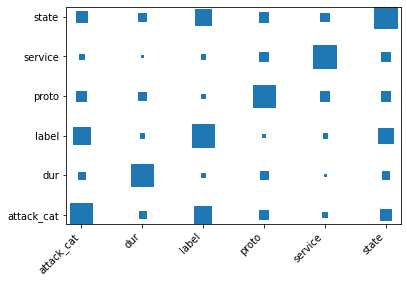

In [19]:
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)